In [1]:
from src.utils import *
import json

The checkpoint state_dict contains keys that are not used by the model:
  pixel_mean
  pixel_std
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}
The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


In [2]:
file_name = "../adv/LAB-2448.pdf"
ocr_df, pdf_images =load_ocr(file_name)

In [3]:
page_index = 2
image=np.asarray(pdf_images[page_index])
image= clean_image(image,ocr_df,page_index)
layout_df=layout_model(image,page_index)
layout_df_=correct_df_area(ocr_df,page_index,layout_df)
data = extract_words(ocr_df,page_index,layout_df)
# open(f"./{page_index}.json" , "w", encoding="utf-8").write(json.dumps(data,indent=4, ensure_ascii=False))


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/detectron2/modeling/roi_heads/fast_rcnn.py:154: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  filter_inds = filter_mask.nonzero()


[ 0  1  3  4  5  6  7  8  9 14 15 16]


In [4]:
layout_df

,x_1,y_1,x_2,y_2,block_type,type,score,is_overlap,page_index,height,width,page_width,page_height,data,is_bold,clean_data,word_length,is_upper,final_type,is_duplicate
9,100.492851,72.209229,156.788376,85.977478,rectangle,Title,0.886360,True,2,13.768250,56.295525,612,792,"[1.0, PURPOSE]",True,1.0 PURPOSE,2,True,Title,False
7,72.604584,92.000610,519.983276,133.671799,rectangle,Text,0.920680,True,2,41.671188,447.378693,612,792,"[The, purpose, of, this, document, is, to, des...",False,The purpose of this document is to describe th...,31,False,Text,False
4,99.517281,140.566879,140.700623,156.595535,rectangle,Title,0.933131,True,2,16.028656,41.183342,612,792,"[2.0, SCOPE]",True,2.0 SCOPE,2,True,Title,False
5,70.609581,161.490753,521.184937,188.701324,rectangle,Text,0.921278,True,2,27.210571,450.575356,612,792,"[This, method, applies, to, formulated, bulk, ...",False,This method applies to formulated bulk rhBMP-2...,15,False,Text,False
16,80.809402,203.144470,525.727173,260.838623,rectangle,Text,0.312016,True,2,57.694153,444.917770,612,792,"[NOTE:, This, method, is, used, at, external, ...",True,NOTE: This method is used at external sites. C...,40,False,Text,False
6,100.098770,266.889862,167.001617,281.443329,rectangle,Title,0.920826,True,2,14.553467,66.902847,612,792,"[3.0, PRINCIPLE]",True,3.0 PRINCIPLE,2,True,Title,False
0,69.990448,287.836884,536.239197,424.175720,rectangle,Text,0.997446,True,2,136.338837,466.248749,612,792,"[RP-HPLC, is, based, upon, both, differential,...",False,RP-HPLC is based upon both differential partit...,139,False,Text,False
3,99.900993,432.127228,203.347336,448.081055,rectangle,Title,0.964079,True,2,15.953827,103.446342,612,792,"[4.0, RESPONSIBILITY]",True,4.0 RESPONSIBILITY,2,True,Title,False
1,71.419456,454.882629,515.652100,495.112305,rectangle,Text,0.987577,True,2,40.229675,444.232643,612,792,"[It, is, the, responsibility, of, the, person,...",False,It is the responsibility of the person perform...,35,False,Text,False
8,100.451622,515.765137,281.142456,529.998352,rectangle,Title,0.913345,True,2,14.233215,180.690834,612,792,"[5.0, EQUIPMENT, AND, MATERIALS]",True,5.0 EQUIPMENT AND MATERIALS,4,True,Title,False


In [5]:
layout_df_

,x_1,y_1,x_2,y_2,block_type,type,score,page_index,height,width,page_width,page_height,data,is_bold,clean_data,word_length,is_upper,final_type,is_duplicate
9,100.492851,72.209229,156.788376,85.977478,rectangle,Title,0.886360,2,13.768250,56.295525,612,792,"[1.0, PURPOSE]",True,1.0 PURPOSE,2,True,Title,False
7,72.604584,92.000610,519.983276,133.671799,rectangle,Text,0.920680,2,41.671188,447.378693,612,792,"[The, purpose, of, this, document, is, to, des...",False,The purpose of this document is to describe th...,31,False,Text,False
4,99.517281,140.566879,140.700623,156.595535,rectangle,Title,0.933131,2,16.028656,41.183342,612,792,"[2.0, SCOPE]",True,2.0 SCOPE,2,True,Title,False
5,70.609581,161.490753,521.184937,188.701324,rectangle,Text,0.921278,2,27.210571,450.575356,612,792,"[This, method, applies, to, formulated, bulk, ...",False,This method applies to formulated bulk rhBMP-2...,15,False,Text,False
16,80.809402,203.144470,525.727173,260.838623,rectangle,Text,0.312016,2,57.694153,444.917770,612,792,"[NOTE:, This, method, is, used, at, external, ...",True,NOTE: This method is used at external sites. C...,40,False,Text,False
6,100.098770,266.889862,167.001617,281.443329,rectangle,Title,0.920826,2,14.553467,66.902847,612,792,"[3.0, PRINCIPLE]",True,3.0 PRINCIPLE,2,True,Title,False
0,69.990448,287.836884,536.239197,424.175720,rectangle,Text,0.997446,2,136.338837,466.248749,612,792,"[RP-HPLC, is, based, upon, both, differential,...",False,RP-HPLC is based upon both differential partit...,139,False,Text,False
3,99.900993,432.127228,203.347336,448.081055,rectangle,Title,0.964079,2,15.953827,103.446342,612,792,"[4.0, RESPONSIBILITY]",True,4.0 RESPONSIBILITY,2,True,Title,False
1,71.419456,454.882629,515.652100,495.112305,rectangle,Text,0.987577,2,40.229675,444.232643,612,792,"[It, is, the, responsibility, of, the, person,...",False,It is the responsibility of the person perform...,35,False,Text,False
8,100.451622,515.765137,281.142456,529.998352,rectangle,Title,0.913345,2,14.233215,180.690834,612,792,"[5.0, EQUIPMENT, AND, MATERIALS]",True,5.0 EQUIPMENT AND MATERIALS,4,True,Title,False


In [9]:
data = extract_words(ocr_df,page_index,layout_df)

In [12]:
data[3]

{'page_index': 3,
 'type': 'List',
 'final_type': 'List',
 'text': ' rhBMP-2 Reference Material  Acetonitrile (HPLC Grade, example: Fisher Cat. #A998-4)  Purified water (example: Milli-Q  )  Trifluroacetic Acid (TFA), purity  99.5% (1 g vials, example: Pierce Sequenal Grade Cat # 28902)  Sucrose (examples: Fisher Cat #S5-500)  Glycine (example: Fisher Cat #BP381-500)  Sodium Chloride (NaCl) (example: Fisher Cat #S671-500)  L-Glutamic Acid (example: Sigma Cat #G1126)  Polysorbate 80 - Vegetable Derived (examples: Croda, PN #Crillet 4HP, or Uniqema)  Hydrochloric Acid, 5M SOP-15245  25% Sodium Hydroxide (NaOH) SOP-15246  Water for Injection (WFI)  Helium gas (grade 99.999% pure)  BMP-2 DS Formulation Buffer'}

In [6]:
import matplotlib.pyplot as plt

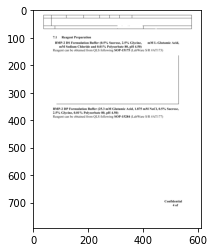

In [7]:
plt.imshow(image)

In [18]:
for i,x in layout_df_.iterrows():
    print(x['clean_data'])

 Calibrated pipettes  Appropriate glassware  Analytical balance, accurate to 0.001g  0.2  m filter (example: Nalgene)
MATERIALS
NOTE: Unless otherwise noted, reagent grade or better materials are used.
 rhBMP-2 Reference Material  Acetonitrile (HPLC Grade, example: Fisher Cat. #A998-4)  Purified water (example: Milli-Q  )  Trifluroacetic Acid (TFA), purity ≥ 99.5% (1 g vials, example: Pierce Sequenal Grade Cat # 28902)  Sucrose (examples: Fisher Cat #S5-500)  Glycine (example: Fisher Cat #BP381-500)  Sodium Chloride (NaCl) (example: Fisher Cat #S671-500)  L-Glutamic Acid (example: Sigma Cat #G1126)  Polysorbate 80 - Vegetable Derived (examples: Croda, PN #Crillet 4HP, or Uniqema)  Hydrochloric Acid, 5M SOP-15245  25% Sodium Hydroxide (NaOH) SOP-15246  Water for Injection (WFI)  Helium gas (grade 99.999% pure)  BMP-2 DS Formulation Buffer
6.0 SAFETY CONSIDERATIONS
Acetonitrile and Trifluoroacetic Acid are hazardous chemicals. Acetonitrile is an irritant, a known muta

In [5]:
from os.path import exists
files =glob.glob("../adv/*2352.pdf")
files

['../adv/LAB-22059.pdf',
 '../adv/LAB-42529.pdf',
 '../adv/LAB-2448.pdf',
 '../adv/LAB-38621.pdf',
 '../adv/LAB-2332.pdf',
 '../adv/LAB-27636.pdf',
 '../adv/LAB-2352.pdf',
 '../adv/LAB-36529.pdf',
 '../adv/LAB-37658.pdf',
 '../adv/LAB-3081.pdf',
 '../adv/LAB-37801.pdf',
 '../adv/LAB-41057.pdf',
 '../adv/LAB-37879.pdf']

In [3]:
import glob
import json 
import pandas as pd
files =glob.glob("../adv/LAB-2352.pdf")
for idx,fi in enumerate(files):
    print(f"file..{fi}")
    file_name = fi
    ocr_df, pdf_images = load_ocr(file_name)
    data_whole={}
    for _ in range(len(pdf_images)):
        page_index = _
        image=np.asarray(pdf_images[page_index])
        image= clean_image(image,ocr_df,page_index)
        layout_df=layout_model(image,page_index)
        layout_df=correct_df_area(ocr_df,page_index,layout_df)
        data = extract_words(ocr_df,page_index,layout_df)
        data_whole[f'page_no_{_}']= data

    fname=fi.replace(".pdf",".json").split('/')[-1]
    
    open(f"../adv/{fname}" , "w", encoding="utf-8").write(json.dumps(data_whole,indent=4, ensure_ascii=True))


file..../adv/LAB-2352.pdf
[1 2]
[3 4]
[ 0  1  2  3  4  5  6  7  8  9 11]
[ 0  1  2  3  4  5  6  7  9 10 12]
[0 1]
[0 1 2 3 4 5]
[0 1 2 3 5 7]
[ 2  3  4  5  6  7  8  9 10 11 12]
[ 0  1  2  3  4  5  6  7 10 12 13 14 15 16 17]
[0 2 3 4 5 6 7 8 9]
[0 1 3]
[1 3]
[0 1 2]
[1]
[0 1]
[0]


In [ ]:
# open(f"../adv/{fname}" , "w", encoding="utf-8").write(json.dumps(data_whole,indent=4, ensure_ascii=False))

In [ ]:
# layout_df